In [2]:
import pandas as pd 
salary_data = pd.read_csv("Salary_Data.csv")

In [3]:
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
salary_data[salary_data.duplicated()].shape

(0, 2)

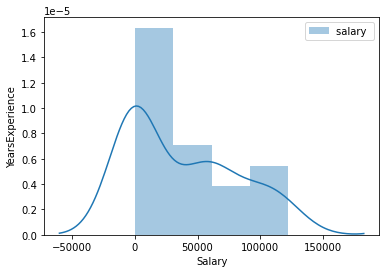

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(salary_data,label = "salary ")
plt.ylabel("YearsExperience")
plt.xlabel("Salary")
plt.legend()

In [16]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


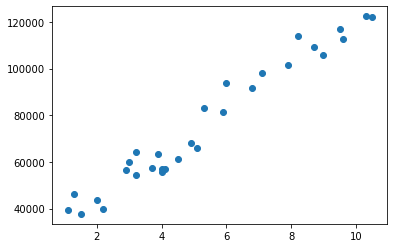

In [17]:
plt.scatter(x="YearsExperience",y="Salary",data = salary_data)

In [20]:
import statsmodels.formula.api as smf
sm_model =smf.ols("Salary~YearsExperience",data = salary_data).fit()

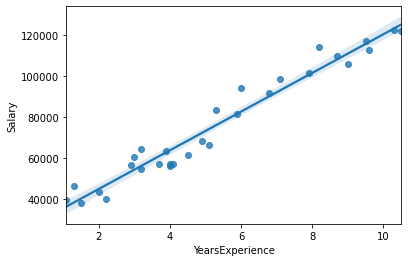

In [22]:
sns.regplot(x="YearsExperience",y="Salary",data = salary_data)

In [24]:
print(sm_model.params)
print(sm_model.pvalues)
print(sm_model.tvalues)
print(sm_model.rsquared,sm_model.rsquared_adj)

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64
Intercept          11.346940
YearsExperience    24.950094
dtype: float64
0.9569566641435086 0.9554194021486339


In [26]:
#predict 5 and 3 years experience candidates salary
newdata = pd.Series([5,3])

In [27]:
data_pred = pd.DataFrame(newdata,columns = ['YearsExperience'])

In [30]:
sm_model.predict(data_pred)

0    73042.011806
1    54142.087163
dtype: float64

In [31]:
sm_model1 =smf.ols("YearsExperience~Salary",data = salary_data).fit()

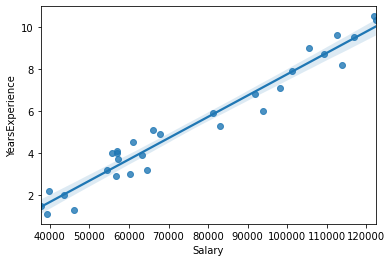

In [32]:
sns.regplot(x="Salary",y="YearsExperience",data = salary_data)

In [33]:
print(sm_model1.params)
print(sm_model1.pvalues)
print(sm_model1.tvalues)
print(sm_model1.rsquared,sm_model1.rsquared_adj)

Intercept   -2.383161
Salary       0.000101
dtype: float64
Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64
Intercept    -7.281283
Salary       24.950094
dtype: float64
0.9569566641435086 0.9554194021486339


In [34]:
sm_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           1.14e-20
Time:                        08:51:42   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""